# Titanic Competition from Kaggle

In [16]:
import pandas as pd

df = pd.read_csv("./datasets/titanic/train.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [18]:
df = df.drop(columns=["Name", "Ticket", "Cabin", "Fare"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,S
2,1,1,female,38.0,1,0,C
3,1,3,female,26.0,0,0,S
4,1,1,female,35.0,1,0,S
5,0,3,male,35.0,0,0,S


In [19]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [21]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

df["Sex"] = label_encoder.fit_transform(df["Sex"])
df["Embarked"] = label_encoder.fit_transform(df["Embarked"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,2
2,1,1,0,38.0,1,0,0
3,1,3,0,26.0,0,0,2
4,1,1,0,35.0,1,0,2
5,0,3,1,35.0,0,0,2


In [23]:
labels = df["Survived"]
features = df.drop(columns=["Survived"])

In [24]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
1,3,1,22.0,1,0,2
2,1,0,38.0,1,0,0
3,3,0,26.0,0,0,2
4,1,0,35.0,1,0,2
5,3,1,35.0,0,0,2


In [25]:
labels.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    # "max_features": ["auto", "sqrt", "log2"],
}

rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=1, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

print("Best parameters found: ", rf_random.best_params_)

/home/chris27/miniconda3/envs/notebook/lib/python3.13/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}


In [45]:
model = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split=5, min_samples_leaf=2, max_depth=None)

In [46]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179

Confusion Matrix:
[[94 11]
 [20 54]]


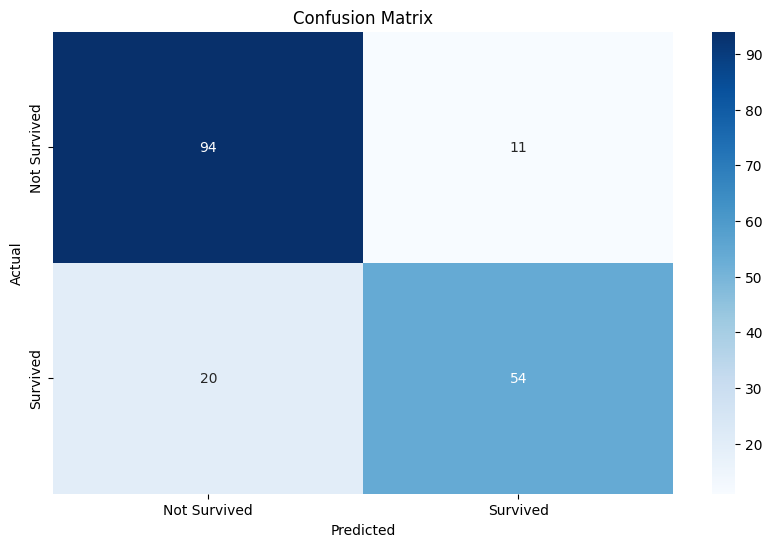

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [54]:
test = pd.read_csv("./datasets/titanic/test.csv", index_col="PassengerId")
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
test.drop(columns=["Name", "Ticket", "Cabin", "Fare"], inplace=True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
892,3,male,34.5,0,0,Q
893,3,female,47.0,1,0,S
894,2,male,62.0,0,0,Q
895,3,male,27.0,0,0,S
896,3,female,22.0,1,1,S


In [56]:
test.tail()

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
1305,3,male,NaN,0,0,S
1306,1,female,39.0,0,0,C
1307,3,male,38.5,0,0,S
1308,3,male,NaN,0,0,S
1309,3,male,NaN,1,1,C


In [57]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [58]:
test["Age"] = test["Age"].fillna(test["Age"].mean())
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [59]:
test["Sex"] = label_encoder.fit_transform(test["Sex"])

In [62]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
892,3,1,34.5,0,0,Q
893,3,0,47.0,1,0,S
894,2,1,62.0,0,0,Q
895,3,1,27.0,0,0,S
896,3,0,22.0,1,1,S


In [63]:
test["Embarked"] = label_encoder.fit_transform(test["Embarked"])
test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
892,3,1,34.5,0,0,1
893,3,0,47.0,1,0,2
894,2,1,62.0,0,0,1
895,3,1,27.0,0,0,2
896,3,0,22.0,1,1,2


In [64]:
predictions = model.predict(test)
predictions[:10]

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [65]:
submission = pd.DataFrame({
    'PassengerId': test.index,
    'Survived': predictions
})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [66]:
submission.to_csv("./results/submission.csv", index=False)